In [3]:
import pandas as pd

# Load the dataset
file_path = "/content/bus_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

print(df_info)
print(df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64865 entries, 0 to 64864
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   shape_id             64865 non-null  object 
 1   shape_pt_lat         64865 non-null  float64
 2   shape_pt_lon         64865 non-null  float64
 3   shape_pt_sequence    64865 non-null  int64  
 4   shape_dist_traveled  0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.5+ MB
None
<bound method NDFrame.head of       shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence  \
0          01U     21.198447     72.808734                  0   
1          01U     21.198630     72.807190                  1   
2          01U     21.198620     72.807190                  2   
3          01U     21.198620     72.807180                  3   
4          01U     21.198620     72.807160                  4   
...        ...           ...           ...             

In [8]:
# Load the CSV files
bus_data_path = "/content/bus_data.csv"
itms_data_path = "/content/itms_22Mar_2hours.csv"

# Read a few rows from each dataset
bus_df = pd.read_csv(bus_data_path)
itms_df = pd.read_csv(itms_data_path)

# Display basic info and first few rows
bus_info = bus_df.info(), bus_df.head()
itms_info = itms_df.info(), itms_df.head()

bus_info, itms_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64865 entries, 0 to 64864
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   shape_id             64865 non-null  object 
 1   shape_pt_lat         64865 non-null  float64
 2   shape_pt_lon         64865 non-null  float64
 3   shape_pt_sequence    64865 non-null  int64  
 4   shape_dist_traveled  0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124877 entries, 0 to 124876
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                124877 non-null  object 
 1   trip_delay              124844 non-null  float64
 2   license_plate           124877 non-null  object 
 3   last_stop_arrival_time  109020 non-null  object 
 4   trip_id                 124877 non-null 

((None,
    shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence  shape_dist_traveled
  0      01U     21.198447     72.808734                  0                  NaN
  1      01U     21.198630     72.807190                  1                  NaN
  2      01U     21.198620     72.807190                  2                  NaN
  3      01U     21.198620     72.807180                  3                  NaN
  4      01U     21.198620     72.807160                  4                  NaN),
 (None,
    route_id  trip_delay license_plate last_stop_arrival_time   trip_id  \
  0     254U       412.0    GJ05BZ0811               17:32:02  18224599   
  1      13U       234.0    GJ05BX1806               16:13:09  18230387   
  2      16D       144.0    GJ05BZ2108               17:33:15  18223723   
  3   116BRU       523.0    GJ05BZ0708               17:34:15  18228515   
  4     716U       291.0    GJ05BZ0633               17:34:27  18230042   
  
           observationDateTime trip_directi

In [9]:
from datetime import datetime
import numpy as np

# Drop rows where trip_delay is missing
itms_df = itms_df.dropna(subset=['trip_delay'])

# Convert observationDateTime to datetime format
itms_df['observationDateTime'] = pd.to_datetime(itms_df['observationDateTime'], errors='coerce')

# Extract useful time-based features
itms_df['hour'] = itms_df['observationDateTime'].dt.hour
itms_df['day_of_week'] = itms_df['observationDateTime'].dt.dayofweek

# Extract latitude and longitude from 'location.coordinates' (assuming format: '[lon, lat]')
itms_df[['longitude', 'latitude']] = itms_df['location.coordinates'].str.strip("[]").str.split(',', expand=True).astype(float)

# Convert categorical features
itms_df = pd.get_dummies(itms_df, columns=['trip_direction', 'route_id'], drop_first=True)

# Select relevant features
feature_columns = ['speed', 'hour', 'day_of_week', 'longitude', 'latitude'] + [col for col in itms_df.columns if 'route_id_' in col or 'trip_direction_' in col]
X = itms_df[feature_columns]
y = itms_df['trip_delay']

# Display processed data sample
X.head(), y.head()


(   speed  hour  day_of_week  longitude   latitude  trip_direction_UP  \
 0   10.0    17            1  72.814254  21.221145               True   
 1   29.0    17            1  72.888521  21.190157               True   
 2    6.0    17            1  72.870111  21.189881              False   
 3   17.0    17            1  72.814305  21.167396               True   
 4    5.0    17            1  72.782424  21.200322               True   
 
    route_id_103SD  route_id_103VD  route_id_104D  route_id_104U  ...  \
 0           False           False          False          False  ...   
 1           False           False          False          False  ...   
 2           False           False          False          False  ...   
 3           False           False          False          False  ...   
 4           False           False          False          False  ...   
 
    route_id_504U  route_id_506U  route_id_658D  route_id_658U  route_id_706D  \
 0          False          False       


🔹 Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 124844 entries, 0 to 124876
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype                    
---  ------                  --------------   -----                    
 0   route_id                124844 non-null  object                   
 1   trip_delay              124844 non-null  float64                  
 2   license_plate           124844 non-null  object                   
 3   last_stop_arrival_time  109020 non-null  object                   
 4   trip_id                 124844 non-null  int64                    
 5   observationDateTime     124844 non-null  datetime64[ns, UTC+05:30]
 6   trip_direction          124844 non-null  object                   
 7   vehicle_label           124844 non-null  object                   
 8   id                      124844 non-null  object                   
 9   last_stop_id            124844 non-null  int64                    
 10  ac

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


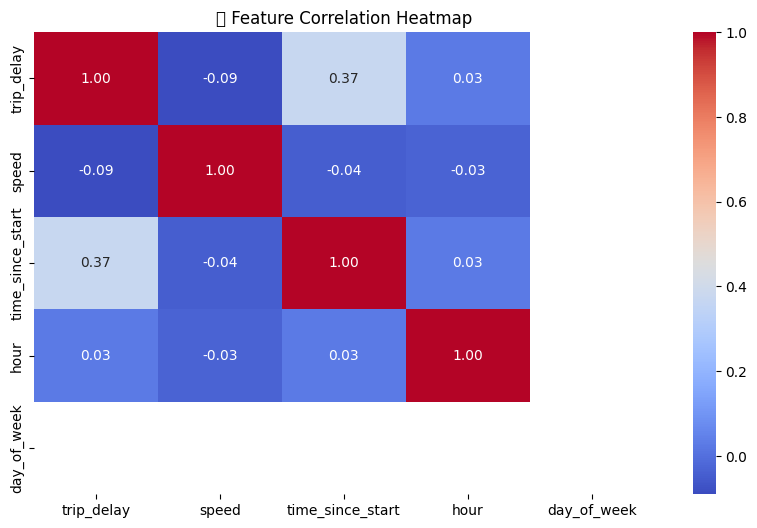

<ipython-input-18-39e560050851>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_delay.index, y=route_delay.values, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


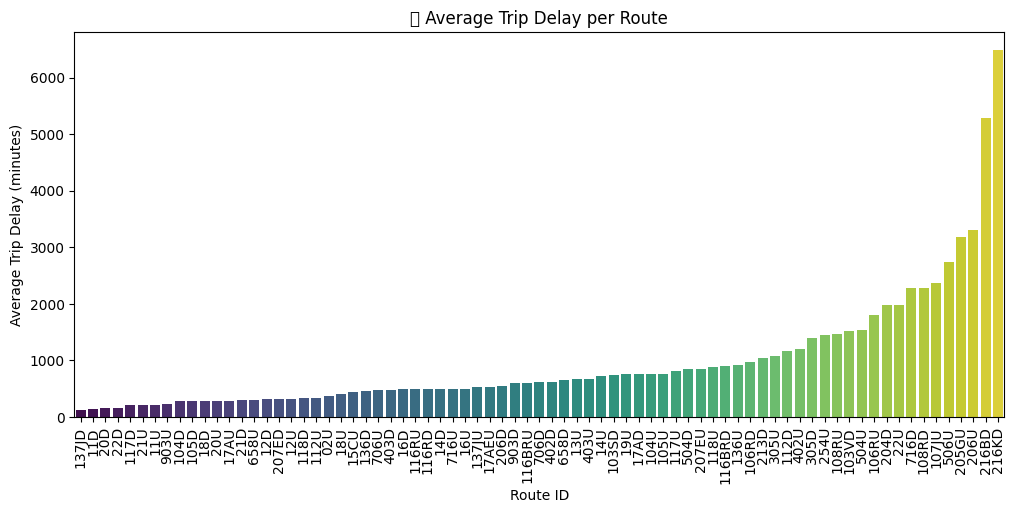

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


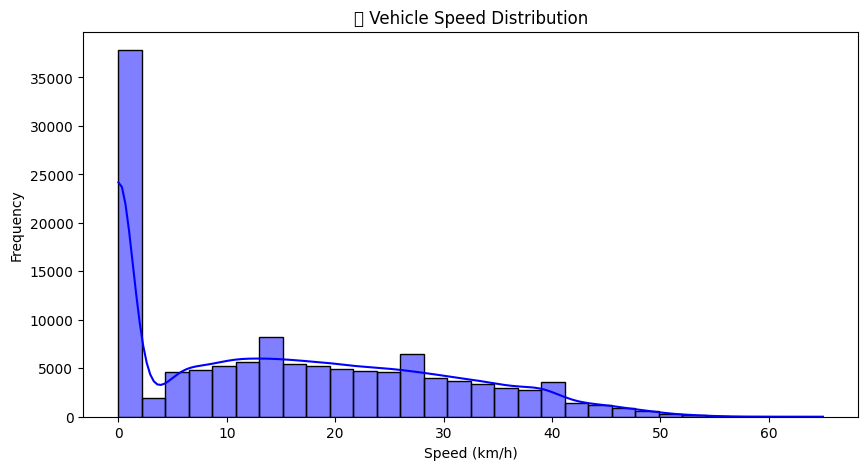

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


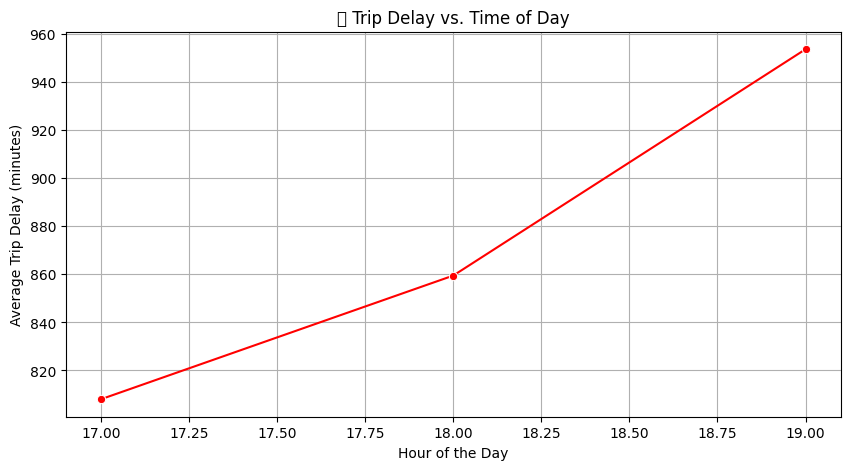

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


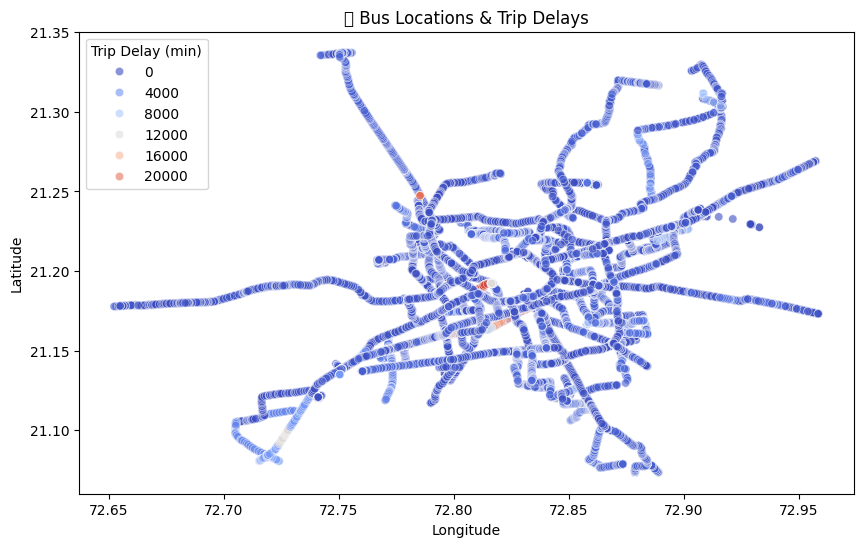

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
file_path = "itms_22Mar_2hours.csv"  # Update with correct file path if needed
df = pd.read_csv(file_path)

# Convert datetime columns
df["observationDateTime"] = pd.to_datetime(df["observationDateTime"], errors='coerce')
df["actual_trip_start_time"] = pd.to_datetime(df["actual_trip_start_time"], errors='coerce')

# Extract time-based features
df["hour"] = df["observationDateTime"].dt.hour
df["minute"] = df["observationDateTime"].dt.minute
df["day_of_week"] = df["observationDateTime"].dt.dayofweek
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# Time since trip start (in minutes)
df["time_since_start"] = (df["observationDateTime"] - df["actual_trip_start_time"]).dt.total_seconds() / 60

# Convert location to lat/lon
df["latitude"] = df["location.coordinates"].apply(lambda x: eval(x)[1] if isinstance(x, str) else np.nan)
df["longitude"] = df["location.coordinates"].apply(lambda x: eval(x)[0] if isinstance(x, str) else np.nan)

# Drop missing values for visualization
df = df.dropna(subset=["trip_delay", "speed", "latitude", "longitude"])

### **1️⃣ Data Summary**
print("\n🔹 Basic Dataset Info:")
print(df.info())

print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Descriptive Statistics:")
print(df.describe())

### **2️⃣ Heatmap (Correlation Analysis)**
plt.figure(figsize=(10, 6))
sns.heatmap(df[["trip_delay", "speed", "time_since_start", "hour", "day_of_week"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Feature Correlation Heatmap")
plt.show()

### **3️⃣ Trip Delay by Route (Bar Plot)**
plt.figure(figsize=(12, 5))
route_delay = df.groupby("route_id")["trip_delay"].mean().sort_values()
sns.barplot(x=route_delay.index, y=route_delay.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("🛣️ Average Trip Delay per Route")
plt.xlabel("Route ID")
plt.ylabel("Average Trip Delay (minutes)")
plt.show()

### **4️⃣ Vehicle Speed Distribution (Histogram)**
plt.figure(figsize=(10, 5))
sns.histplot(df["speed"], bins=30, kde=True, color="blue")
plt.title("🚗 Vehicle Speed Distribution")
plt.xlabel("Speed (km/h)")
plt.ylabel("Frequency")
plt.show()

### **5️⃣ Trip Delay vs. Time of Day (Line Plot)**
plt.figure(figsize=(10, 5))
hourly_delay = df.groupby("hour")["trip_delay"].mean()
sns.lineplot(x=hourly_delay.index, y=hourly_delay.values, marker="o", color="red")
plt.title("⏳ Trip Delay vs. Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Trip Delay (minutes)")
plt.grid()
plt.show()

### **6️⃣ Routes Map (Scatter Plot of Bus Locations)**
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["trip_delay"], palette="coolwarm", alpha=0.6)
plt.title("🗺️ Bus Locations & Trip Delays")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Trip Delay (min)")
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# 1️⃣ Load Data
file_path = "itms_22Mar_2hours.csv"  # Update path if needed
df = pd.read_csv(file_path)

# 2️⃣ Preprocess Data
# Convert datetime columns
df["observationDateTime"] = pd.to_datetime(df["observationDateTime"], errors='coerce')
df["actual_trip_start_time"] = pd.to_datetime(df["actual_trip_start_time"], errors='coerce')

# Extract time-based features
df["hour"] = df["observationDateTime"].dt.hour
df["day_of_week"] = df["observationDateTime"].dt.dayofweek

# Handle location data (convert list to separate lat/lon columns)
df["latitude"] = df["location.coordinates"].apply(lambda x: eval(x)[1] if isinstance(x, str) else np.nan)
df["longitude"] = df["location.coordinates"].apply(lambda x: eval(x)[0] if isinstance(x, str) else np.nan)

# Encode categorical features
categorical_cols = ["route_id", "license_plate", "trip_id", "trip_direction", "vehicle_label", "last_stop_id"]
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Ensure all are strings
    df[col] = LabelEncoder().fit_transform(df[col])

# Select relevant columns for training
features = ["route_id", "hour", "day_of_week", "trip_id", "trip_direction",
            "vehicle_label", "last_stop_id", "speed", "latitude", "longitude"]
target = "trip_delay"

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + [target])

# 3️⃣ Split Data
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train[["speed", "latitude", "longitude"]] = scaler.fit_transform(X_train[["speed", "latitude", "longitude"]])
X_test[["speed", "latitude", "longitude"]] = scaler.transform(X_test[["speed", "latitude", "longitude"]])

# 4️⃣ Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5️⃣ Evaluate Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 6️⃣ Save Model for Future Use
joblib.dump(model, "trip_delay_model.pkl")
joblib.dump(scaler, "scaler.pkl")


📊 Model Performance:
MAE: 38.91
RMSE: 243.78


['scaler.pkl']

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import xgboost as xgb

# Load Data
file_path = "itms_22Mar_2hours.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Convert datetime columns
df["observationDateTime"] = pd.to_datetime(df["observationDateTime"], errors='coerce')
df["actual_trip_start_time"] = pd.to_datetime(df["actual_trip_start_time"], errors='coerce')

# Extract time features
df["hour"] = df["observationDateTime"].dt.hour
df["day_of_week"] = df["observationDateTime"].dt.dayofweek

# Convert location to lat/lon
df["latitude"] = df["location.coordinates"].apply(lambda x: eval(x)[1] if isinstance(x, str) else np.nan)
df["longitude"] = df["location.coordinates"].apply(lambda x: eval(x)[0] if isinstance(x, str) else np.nan)

# One-hot encode categorical features
categorical_cols = ["route_id", "trip_direction"]
df[categorical_cols] = df[categorical_cols].astype(str)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Select features
features = ["hour", "day_of_week", "speed", "latitude", "longitude"] + list(df.columns[df.columns.str.startswith("route_id")]) + list(df.columns[df.columns.str.startswith("trip_direction")])
target = "trip_delay"

# Remove outliers using IQR
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[target] >= Q1 - 1.5 * IQR) & (df[target] <= Q3 + 1.5 * IQR)]

# Drop missing values
df = df.dropna(subset=features + [target])

# Train-test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[["speed", "latitude", "longitude"]] = scaler.fit_transform(X_train[["speed", "latitude", "longitude"]])
X_test[["speed", "latitude", "longitude"]] = scaler.transform(X_test[["speed", "latitude", "longitude"]])

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate model
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Optimized Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Save model & scaler
joblib.dump(xgb_model, "optimized_trip_delay_model.pkl")
joblib.dump(scaler, "scaler.pkl")


📊 Optimized Model Performance:
MAE: 162.21
RMSE: 219.99


['scaler.pkl']

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Load Data
file_path = "itms_22Mar_2hours.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Convert datetime columns
df["observationDateTime"] = pd.to_datetime(df["observationDateTime"], errors='coerce')
df["actual_trip_start_time"] = pd.to_datetime(df["actual_trip_start_time"], errors='coerce')

# Extract more time-based features
df["hour"] = df["observationDateTime"].dt.hour
df["minute"] = df["observationDateTime"].dt.minute
df["day_of_week"] = df["observationDateTime"].dt.dayofweek
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# Time since start of trip (in minutes)
df["time_since_start"] = (df["observationDateTime"] - df["actual_trip_start_time"]).dt.total_seconds() / 60

# Convert location to lat/lon
df["latitude"] = df["location.coordinates"].apply(lambda x: eval(x)[1] if isinstance(x, str) else np.nan)
df["longitude"] = df["location.coordinates"].apply(lambda x: eval(x)[0] if isinstance(x, str) else np.nan)

# One-hot encode categorical features
categorical_cols = ["route_id", "trip_direction"]
df[categorical_cols] = df[categorical_cols].astype(str)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Select features
features = [
    "hour", "minute", "day_of_week", "is_weekend", "time_since_start",
    "speed", "latitude", "longitude"
] + list(df.columns[df.columns.str.startswith("route_id")]) + list(df.columns[df.columns.str.startswith("trip_direction")])

target = "trip_delay"

# Remove extreme outliers using IQR
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[target] >= Q1 - 1.5 * IQR) & (df[target] <= Q3 + 1.5 * IQR)]

# Drop missing values
df = df.dropna(subset=features + [target])

# Train-test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RobustScaler (handles outliers better)
scaler = RobustScaler()
X_train[["speed", "latitude", "longitude", "time_since_start"]] = scaler.fit_transform(X_train[["speed", "latitude", "longitude", "time_since_start"]])
X_test[["speed", "latitude", "longitude", "time_since_start"]] = scaler.transform(X_test[["speed", "latitude", "longitude", "time_since_start"]])

# Train a Gradient Boosting Model (LightGBM is better for structured data)
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 New Optimized Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Save model & scaler
joblib.dump(model, "best_trip_delay_model.pkl")
joblib.dump(scaler, "scaler.pkl")


📊 New Optimized Model Performance:
MAE: 131.59
RMSE: 180.57


['scaler.pkl']